<a href="https://colab.research.google.com/github/TurnipPudding/Machine-Learning---SCC0276/blob/Branch-do-Gabriel/trab02_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("processed_microplastics.csv")

In [ ]:
df.head(5)

,year,country,cheese,yoghurt,total_milk,fruits,refined_grains,whole_grains,nuts_and_seeds,total_processed_meats,...,fish,shellfish,eggs,total_salt,added_sugars,non-starchy_vegetables,potatoes,other_starchy_vegetables,beans_and_legumes,total_ug_per_kg
0,1990,Angola,0.191781,54.899739,96.602740,76.520548,481.297149,44.309838,2.849315,22.770109,...,53.013699,0.164384,1.041096,8.005259,32.547945,80.164384,8.109589,39.342466,19.835616,1043.279108
1,1990,Benin,0.054795,9.365946,18.410959,90.876712,534.256965,48.836323,19.561644,17.018264,...,18.794521,3.972603,2.849315,5.854497,8.246575,122.986301,0.000000,304.904110,21.178082,1241.656197
2,1990,Burkina Faso,0.273973,35.390618,56.027397,19.178082,213.170183,129.416119,28.465753,9.541329,...,4.684932,0.000000,6.767123,6.928378,9.534247,64.767123,2.219178,13.780822,32.520548,666.603927
3,1990,Central African Republic,0.000000,19.206478,48.000000,113.397260,285.035375,302.567776,23.506849,26.412094,...,13.917808,0.000000,1.123288,6.585071,19.698630,101.753425,0.575342,209.452055,12.821918,1237.339905
4,1990,Cote D'Ivoire,0.301370,2.220447,38.109589,37.013699,436.907598,25.220347,16.904110,2.459103,...,51.424658,0.493151,2.438356,9.660915,28.438356,151.150685,1.945205,676.575343,2.356164,1540.502458


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      723 non-null    int64  
 1   country                   723 non-null    object 
 2   cheese                    723 non-null    float64
 3   yoghurt                   723 non-null    float64
 4   total_milk                723 non-null    float64
 5   fruits                    723 non-null    float64
 6   refined_grains            723 non-null    float64
 7   whole_grains              723 non-null    float64
 8   nuts_and_seeds            723 non-null    float64
 9   total_processed_meats     723 non-null    float64
 10  unprocessed_red_meats     723 non-null    float64
 11  fish                      723 non-null    float64
 12  shellfish                 723 non-null    float64
 13  eggs                      723 non-null    float64
 14  total_salt

In [ ]:
df.describe()

,year,cheese,yoghurt,total_milk,fruits,refined_grains,whole_grains,nuts_and_seeds,total_processed_meats,unprocessed_red_meats,fish,shellfish,eggs,total_salt,added_sugars,non-starchy_vegetables,potatoes,other_starchy_vegetables,beans_and_legumes,total_ug_per_kg
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,2005.113416,6.135622,54.175691,250.655223,198.891339,310.733750,76.090720,12.716421,43.242799,90.326727,40.367154,7.415298,17.184714,6.844069,87.980939,232.405995,81.885598,64.300877,19.261638,1600.614574
std,9.610611,10.437505,77.868834,243.250670,150.271271,138.658231,81.578881,10.827892,39.223624,67.646655,34.835918,13.695479,14.584195,1.806978,60.331304,164.633624,83.109875,135.136514,16.758578,567.115360
min,1990.000000,0.000000,0.748435,1.808219,8.958904,72.797775,0.158798,0.000000,0.396227,6.583087,0.054795,0.000000,0.027397,2.278036,3.972603,16.931507,0.000000,0.000000,0.438356,440.261767
25%,1995.000000,0.273973,12.048883,50.342466,89.808219,216.258939,16.965904,4.561644,11.560798,33.837311,15.726027,0.191781,3.876712,5.845209,38.753425,118.287671,12.205479,0.493151,7.821918,1176.251294
50%,2005.000000,1.424658,35.390618,153.506849,179.945205,288.254183,47.164800,9.589041,29.473811,71.678223,31.232877,1.589041,13.780822,6.660399,83.698630,185.945205,49.561644,8.547945,14.794521,1550.939573
75%,2015.000000,6.082192,73.449547,400.890411,266.863014,383.983087,101.764947,18.410959,66.736055,134.673403,54.506849,8.630137,27.657534,7.659304,117.616438,292.479452,135.876712,59.123288,25.561644,2061.390253
max,2018.000000,65.643836,679.834239,1040.931507,1078.931507,890.394188,434.121124,73.068493,198.333731,477.301388,207.315068,151.863014,61.698630,12.430686,453.780822,1055.342466,362.712329,833.945206,124.575343,3613.131482


In [ ]:
#Separando as features de contaminação

colums_to_sum = df.columns[2:-1]
colums_to_sum

Index(['cheese', 'yoghurt', 'total_milk', 'fruits', 'refined_grains',
       'whole_grains', 'nuts_and_seeds', 'total_processed_meats',
       'unprocessed_red_meats', 'fish', 'shellfish', 'eggs', 'total_salt',
       'added_sugars', 'non-starchy_vegetables', 'potatoes',
       'other_starchy_vegetables', 'beans_and_legumes'],
      dtype='object')

In [ ]:
#Somando o risco total de contaminação de todos os alimentos pra cada país

df['total_risk'] = df[colums_to_sum].sum(axis=1)
print(df['total_risk'])

0      1043.279108
1      1241.656197
2       666.603927
3      1237.339905
4      1540.502458
          ...     
718    2449.652625
719    1926.873235
720    2375.970526
721    1236.553584
722    1449.618314
Name: total_risk, Length: 723, dtype: float64


In [ ]:
#Definindo o índice de risco por país

df['index_risk_country'] = (df['total_risk']*df['total_ug_per_kg']).round(2)
print(df['index_risk_country'])

0      1088431.30
1      1541710.11
2       444360.80
3      1531010.04
4      2373147.82
          ...    
718    6000797.98
719    3712840.46
720    5645235.94
721    1529064.77
722    2101393.26
Name: index_risk_country, Length: 723, dtype: float64


In [ ]:
#Normalizando a feature 'index_risk_country'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['index_risk_country']])

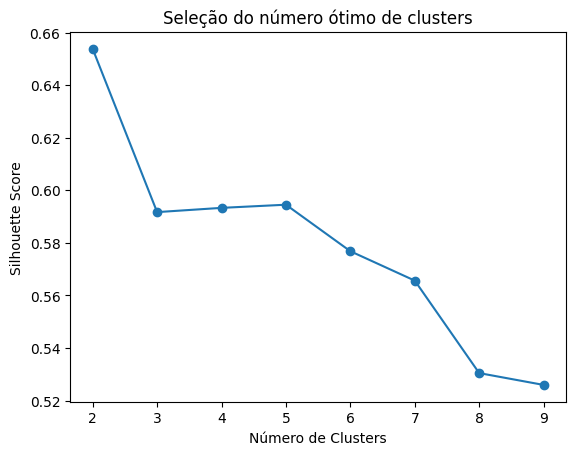

In [ ]:
#Definição do número ideal de clusters via Silhouette Score

s_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    s_scores.append(silhouette_score(X_scaled, labels))

# Visualização
plt.plot(K, s_scores, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.title("Seleção do número ótimo de clusters")
plt.show()

In [ ]:
#Clusterização final com KMeans

best_k = K[s_scores.index(max(s_scores))]

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
print(df[['country','cluster']])

                      country  cluster
0                      Angola        0
1                       Benin        0
2                Burkina Faso        0
3    Central African Republic        0
4               Cote D'Ivoire        0
..                        ...      ...
718                   Ukraine        1
719                   Uruguay        1
720             United States        1
721                 Venezuela        0
722                   Vietnam        0

[723 rows x 2 columns]


In [ ]:
#Análise dos clusters

# Média do índice de risco por cluster
df.groupby('cluster')['index_risk_country'].mean()

,index_risk_country
cluster,
0,1.752715e+06
1,5.290805e+06


Text(0.5, 1.0, 'Distribuição do índice de risco por cluster')

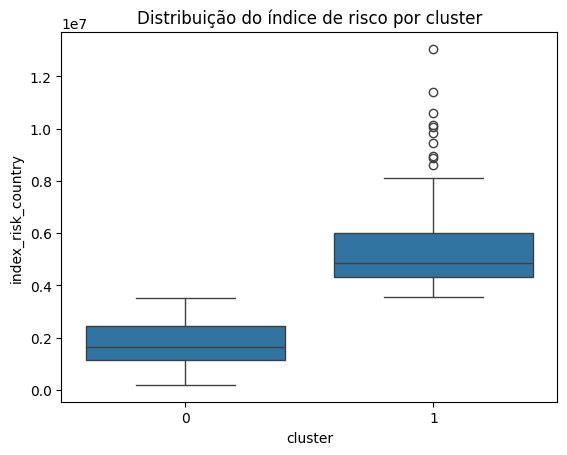

In [ ]:
sns.boxplot(data=df, x='cluster', y='index_risk_country')
plt.title("Distribuição do índice de risco por cluster")